<a href="https://colab.research.google.com/github/romanozamoth/image-dim-reduction-dio/blob/main/img_dim_reduct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving pokes.jpeg to pokes (2).jpeg
Saving gengar2.jpeg to gengar2 (2).jpeg
Saving gengar.jpeg to gengar (2).jpeg


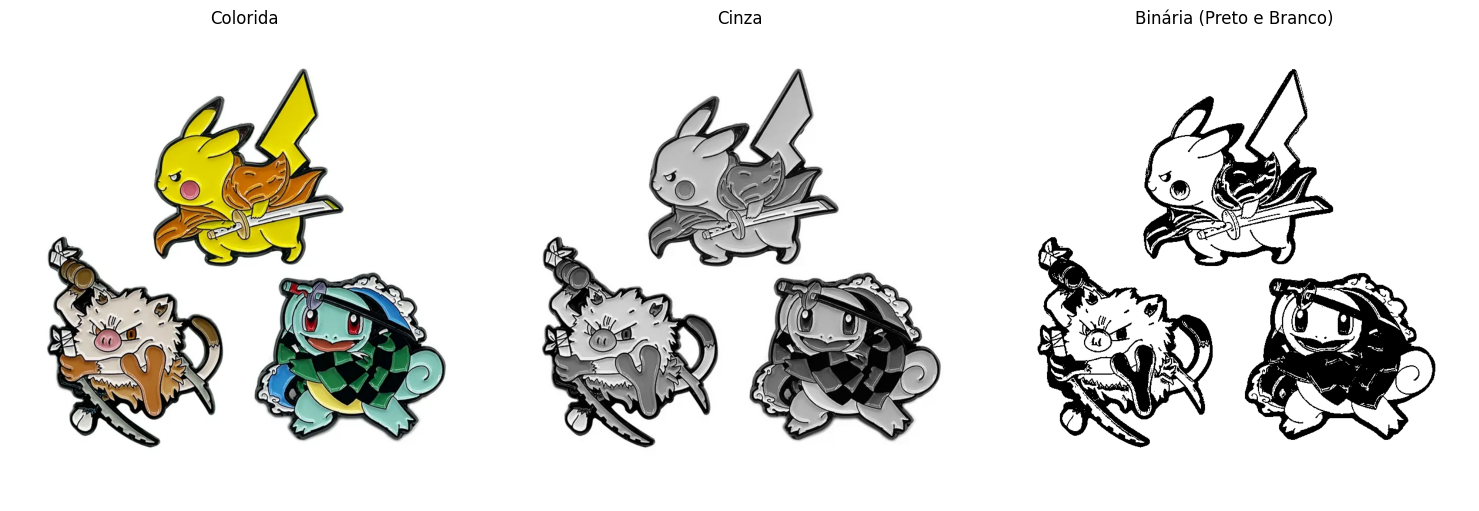

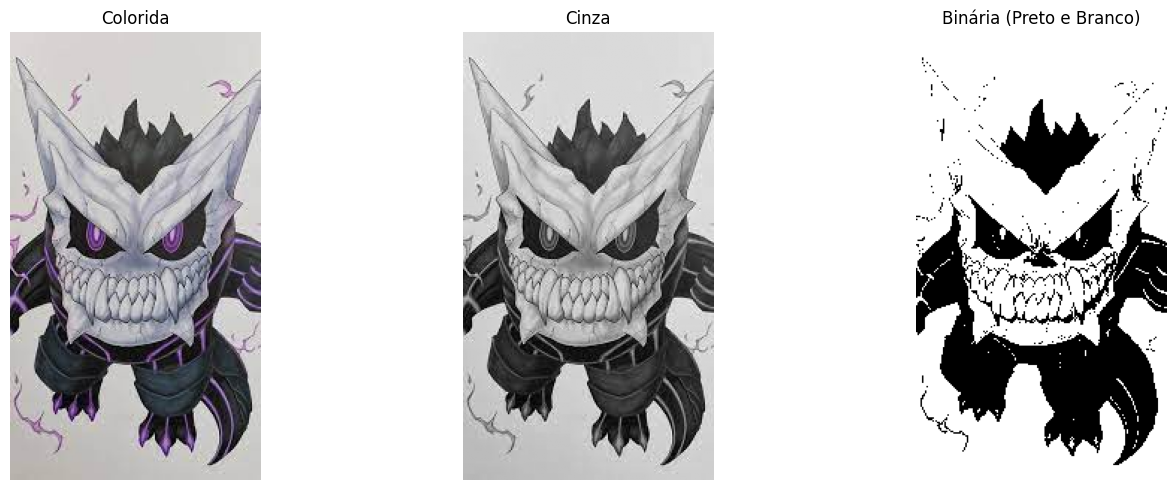

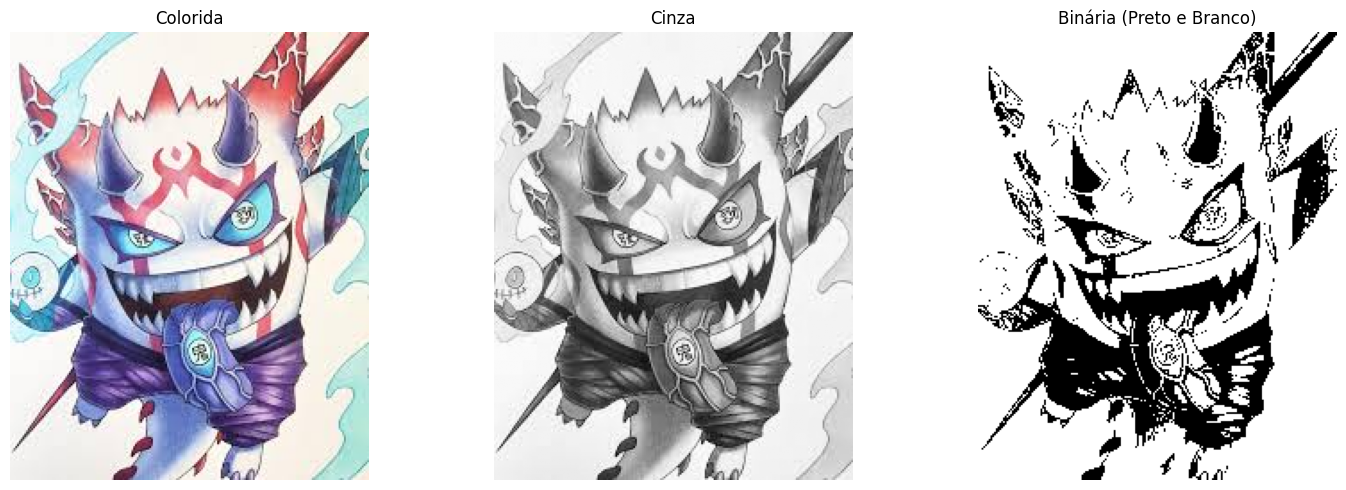

In [3]:
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np

# Upload de imagem
uploaded = files.upload()

# Lê a primeira imagem enviada
for fn in uploaded.keys():
    img_colorida = Image.open(fn).convert("RGB")  # Garante que é RGB
    ## UTILIZANDO A LIB ##
    ### # Converte para escala de cinza (0-255)
    ### img_cinza = img_colorida.convert("L")
    ### # Converte para imagem binária (0 ou 255)
    ### # Aplicando limiar (threshold)
    ### limiar = 128
    ### img_binaria = img_cinza.point(lambda x: 255 if x > limiar else 0, mode='1')

    ## "Manual" ##
    # transforma img em array
    np_img = np.array(img_colorida)
    # Converter manualmente para tons de cinza usando a fórmula de luminância
    r, g, b = np_img[:, :, 0], np_img[:, :, 1], np_img[:, :, 2]
    img_cinza = 0.299 * r + 0.587 * g + 0.114 * b
    # Converte para uint8 (imagem de 8 bits)
    img_cinza = img_cinza.astype(np.uint8)
    # Threshold binário
    limiar = 128
    img_binaria = np.where(img_cinza > limiar, 255, 0).astype(np.uint8)


    # Plotando as 3 imagens
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Imagem colorida
    axs[0].imshow(img_colorida)
    axs[0].set_title("Colorida")
    axs[0].axis("off")

    # Imagem em tons de cinza
    axs[1].imshow(img_cinza, cmap='gray')
    axs[1].set_title("Cinza")
    axs[1].axis("off")

    # Imagem binária (preto e branco)
    axs[2].imshow(img_binaria, cmap='gray')
    axs[2].set_title("Binária (Preto e Branco)")
    axs[2].axis("off")

    plt.tight_layout()
    plt.show()
